In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
from shapely.wkt import loads
%matplotlib inline
ox.__version__



'1.2.0'

In [2]:
ox.settings.use_cache = True
# ox.use_cache = True

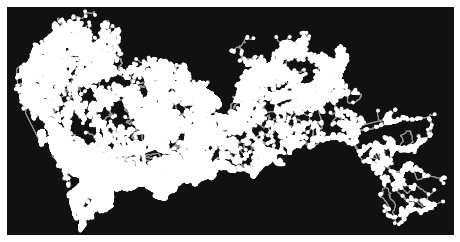

In [3]:
G = ox.graph_from_place("Shenzhen, Guangdong, China", network_type="bike")
fig, ax = ox.plot_graph(G)

In [4]:
# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
 # ox.save_graph_geopackage(G, filepath=r"D:\bike\code\metro\Preprocessing-bike data\bike_road.gpkg")

In [5]:
#  将图形转换成节点和边的GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges.head()

osmid oneway lanes  name       highway reversed  \
u         v          key                                                        
266992397 8244777843 0     97240783  False     2  木棉花街      tertiary    False   
          1126423002 0     97240783  False     2  木棉花街      tertiary     True   
          7293706119 0    193926052  False   NaN   NaN  unclassified     True   
          8244777741 0    478022251   True     2   嘉宾路     secondary    False   
267602106 2278166512 0     31311798  False   NaN   湖贝路      tertiary    False   

                           length  \
u         v          key            
266992397 8244777843 0      9.086   
          1126423002 0    204.696   
          7293706119 0    176.670   
          8244777741 0     83.758   
267602106 2278166512 0     17.927   

                                                                   geometry  \
u         v          key                                                      
266992397 8244777843 0    LINESTRING (114.10450 22.54050, 114.10449 22.5...   
          1126423002 0    LINESTRING (114.10450 22.54050, 114.10451 22.5...   
          7293706119 0    LINESTRING (114.10450 22.54050, 114.10456 22.5...   
          8244777741 0    LINESTRING (114.10450 22.54050, 114.10452 22.5...   
267602106 2278166512 0    LINESTRING (114.12597 22.54951, 114.12581 22.5...   

                          ref tunnel service maxspeed bridge access width  \
u         v          key                                                    
266992397 8244777843 0    NaN    NaN     NaN      NaN    NaN    NaN   NaN   
          1126423002 0    NaN    NaN     NaN      NaN    NaN    NaN   NaN   
          7293706119 0    NaN    NaN     NaN      NaN    NaN    NaN   NaN   
          8244777741 0    NaN    NaN     NaN      NaN    NaN    NaN   NaN   
267602106 2278166512 0    NaN    NaN     NaN      NaN    NaN    NaN   NaN   

                         junction landuse  
u         v          key                   
266992397 8244777843 0        NaN     NaN  
          1126423002 0        NaN     NaN  
          7293706119 0        NaN     NaN  
          8244777741 0        NaN     NaN  
267602106 2278166512 0        NaN     NaN

# bike line

In [6]:
# bike_road.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\bike_road.csv")

In [7]:
bike_road = gdf_edges.reset_index()
bike_road.head()

,u,v,key,osmid,oneway,lanes,name,highway,reversed,length,geometry,ref,tunnel,service,maxspeed,bridge,access,width,junction,landuse
0,266992397,8244777843,0,97240783,False,2,木棉花街,tertiary,False,9.086,"LINESTRING (114.10450 22.54050, 114.10449 22.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,266992397,1126423002,0,97240783,False,2,木棉花街,tertiary,True,204.696,"LINESTRING (114.10450 22.54050, 114.10451 22.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,266992397,7293706119,0,193926052,False,NaN,NaN,unclassified,True,176.670,"LINESTRING (114.10450 22.54050, 114.10456 22.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,266992397,8244777741,0,478022251,True,2,嘉宾路,secondary,False,83.758,"LINESTRING (114.10450 22.54050, 114.10452 22.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,267602106,2278166512,0,31311798,False,NaN,湖贝路,tertiary,False,17.927,"LINESTRING (114.12597 22.54951, 114.12581 22.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
bike_road = bike_road.to_crs('epsg: 32649')

In [47]:
rail_station_count =pd.read_csv(r'D:\bike\code\metro\Preprocessing-bike data\metro_area.csv').drop(columns = 'Unnamed: 0')

geometry = rail_station_count['geometry'].map(shapely.wkt.loads)
rail_station_count = rail_station_count.drop('geometry', axis=1)
rail_station_count = gpd.GeoDataFrame(rail_station_count, geometry=geometry)
rail_station_count = rail_station_count.set_crs("EPSG:4326")

# buffer = 300
rail_station = rail_station_count.to_crs("EPSG:32649")
rail_station['buffer'] = rail_station.buffer(1500)

rail_station_buffer = gpd.GeoDataFrame(rail_station,geometry = 'buffer')
rail_station_buffer = rail_station_buffer.drop(columns = 'index_right')

In [48]:
bike_buffer = gpd.overlay(bike_road,rail_station_buffer)

In [49]:
bike_buffer

,u,v,key,osmid,oneway,lanes,name,highway,reversed,length,...,poiid,lg,sp,lon,lat,hex_id,cluster_la,functional,function_1,geometry
0,266992397,8244777843,0,97240783,False,2,木棉花街,tertiary,False,9.086,...,BV10243546,2,guo mao,114.118909,22.539680,30445,1,Center,1,"LINESTRING (819332.069 2495973.657, 819330.871..."
1,266992397,1126423002,0,97240783,False,2,木棉花街,tertiary,True,204.696,...,BV10243546,2,guo mao,114.118909,22.539680,30445,1,Center,1,"LINESTRING (819332.069 2495973.657, 819332.971..."
2,266992397,7293706119,0,193926052,False,NaN,NaN,unclassified,True,176.670,...,BV10243546,2,guo mao,114.118909,22.539680,30445,1,Center,1,"LINESTRING (819332.069 2495973.657, 819338.231..."
3,266992397,8244777741,0,478022251,True,2,嘉宾路,secondary,False,83.758,...,BV10243546,2,guo mao,114.118909,22.539680,30445,1,Center,1,"LINESTRING (819332.069 2495973.657, 819334.125..."
4,267602106,2278166512,0,31311798,False,NaN,湖贝路,tertiary,False,17.927,...,BV10243546,2,guo mao,114.118909,22.539680,30445,1,Center,1,"LINESTRING (821520.352 2497017.453, 821503.979..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298016,9014320341,9014320319,0,974051373,False,NaN,NaN,unclassified,True,453.848,...,BV10527871,5,GuangMing,113.945241,22.771707,22336,0,Rural,4,"LINESTRING (803433.116 2522030.238, 803452.202..."
298017,9014320342,9014320341,0,974051374,False,NaN,NaN,unclassified,True,371.382,...,BV10527871,5,GuangMing,113.945241,22.771707,22336,0,Rural,4,"LINESTRING (803612.018 2522182.481, 803433.116..."
298018,9027687400,2952323461,0,975549294,False,NaN,NaN,residential,False,401.340,...,BV10527871,5,GuangMing,113.945241,22.771707,22336,0,Rural,4,"LINESTRING (803071.464 2520575.343, 802952.752..."
298019,9995188292,3110728525,0,"[306223792, 306223790]",False,NaN,NaN,"[unclassified, track]",False,472.348,...,BV10527871,5,GuangMing,113.945241,22.771707,22336,0,Rural,4,"LINESTRING (801283.340 2522222.293, 801299.539..."


In [50]:
bike_buffer_merge = bike_buffer.groupby('stationnam').agg({'geometry': lambda s:s.length.sum()})
bike_buffer_merge = bike_buffer_merge.reset_index()
bike_buffer_merge = bike_buffer_merge.rename(columns = {'geometry' : 'length'})
bike_buffer_merge

,stationnam,length
0,上塘,110916.331103
1,上屋,82622.817911
2,上李朗,89402.868467
3,上梅林,163253.752605
4,上水径,104650.430505
...,...,...
229,黄贝岭,130055.413148
230,龙井,161541.482027
231,龙华,108128.346516
232,龙城广场,88122.454364


In [51]:
road_density = rail_station_buffer.merge(bike_buffer_merge, how = 'outer', on = 'stationnam' )

In [52]:
road_density = road_density.fillna(0)

In [53]:
road_density['area'] = road_density.area
road_density['road_density'] = road_density['length']/road_density['area']*1000000/1000  # km/km2

In [54]:
road_density.head()

,linename,stationnam,sl,poiid,lg,sp,lon,lat,hex_id,cluster_la,functional,function_1,geometry,buffer,length,area,road_density
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,Rural,4,POINT (820809.311 2495070.993),"POLYGON ((822309.311 2495070.993, 822302.088 2...",73177.099316,7.057234e+06,10.369091
1,地铁9号线,人民南,"114.118154,22.535514",BV10447615,0,ren min nan,114.118154,22.535514,30444,0,Rural,4,POINT (820748.669 2495450.082),"POLYGON ((822248.669 2495450.082, 822241.446 2...",105932.366561,7.057234e+06,15.010465
2,地铁1号线(罗宝线),国贸,"114.118909,22.539680",BV10243546,2,guo mao,114.118909,22.539680,30445,1,Center,1,POINT (820816.745 2495913.339),"POLYGON ((822316.745 2495913.339, 822309.522 2...",137664.186830,7.057234e+06,19.506819
3,地铁1号线(罗宝线),老街,"114.116939,22.544232",BV10249964,2,lao jie,114.116939,22.544232,30441,1,Center,1,POINT (820603.435 2496413.511),"POLYGON ((822103.435 2496413.511, 822096.212 2...",174513.377905,7.057234e+06,24.728297
4,地铁1号线(罗宝线),大剧院,"114.107811,22.541800",BV10246013,3,DaJuYuan,114.107811,22.541800,30440,1,Center,1,POINT (819669.497 2496124.436),"POLYGON ((821169.497 2496124.436, 821162.274 2...",185069.468245,7.057234e+06,26.224080


# intersections

In [55]:
bike_nodes = gdf_nodes.reset_index()

In [56]:
# bike_nodes.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\bike_nodes.csv")

In [57]:
bike_nodes.head()

,osmid,y,x,street_count,ref,highway,geometry
0,266992397,22.540503,114.104504,5,NaN,NaN,POINT (114.10450 22.54050)
1,267602106,22.549507,114.125966,4,NaN,NaN,POINT (114.12597 22.54951)
2,267602126,22.550433,114.133136,3,NaN,NaN,POINT (114.13314 22.55043)
3,277058161,22.596456,114.231161,1,1018,motorway_junction,POINT (114.23116 22.59646)
4,277058167,22.593485,114.235955,3,NaN,NaN,POINT (114.23596 22.59348)


In [58]:
bike_nodes = bike_nodes.to_crs('EPSG:32649')

In [59]:
rail_station_buffer = rail_station_buffer.sjoin(bike_nodes, how='inner', predicate='contains')
rail_station_buffer.head()

,linename,stationnam,sl,poiid,lg,sp,lon,lat,hex_id,cluster_la,...,function_1,geometry,buffer,index_right,osmid,y,x,street_count,ref,highway
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,4,POINT (820809.311 2495070.993),"POLYGON ((822309.311 2495070.993, 822302.088 2...",5949,8234507614,22.544982,114.122304,4,NaN,NaN
1,地铁9号线,人民南,"114.118154,22.535514",BV10447615,0,ren min nan,114.118154,22.535514,30444,0,...,4,POINT (820748.669 2495450.082),"POLYGON ((822248.669 2495450.082, 822241.446 2...",5949,8234507614,22.544982,114.122304,4,NaN,NaN
2,地铁1号线(罗宝线),国贸,"114.118909,22.539680",BV10243546,2,guo mao,114.118909,22.539680,30445,1,...,1,POINT (820816.745 2495913.339),"POLYGON ((822316.745 2495913.339, 822309.522 2...",5949,8234507614,22.544982,114.122304,4,NaN,NaN
3,地铁1号线(罗宝线),老街,"114.116939,22.544232",BV10249964,2,lao jie,114.116939,22.544232,30441,1,...,1,POINT (820603.435 2496413.511),"POLYGON ((822103.435 2496413.511, 822096.212 2...",5949,8234507614,22.544982,114.122304,4,NaN,NaN
60,地铁2号线(8号线),湖贝,"114.125437,22.544287",BV10250000,4,HuBei,114.125437,22.544287,25299,1,...,1,POINT (821478.014 2496437.893),"POLYGON ((822978.014 2496437.893, 822970.791 2...",5949,8234507614,22.544982,114.122304,4,NaN,NaN


In [60]:
rail_station_buffer =  rail_station_buffer.groupby(by = 'stationnam').count().reset_index()

In [61]:
bike_intersections = rail_station_buffer[['stationnam','osmid']]
bike_intersections

,stationnam,osmid
0,上塘,412
1,上屋,203
2,上李朗,189
3,上梅林,642
4,上水径,283
...,...,...
229,黄贝岭,451
230,龙井,520
231,龙华,368
232,龙城广场,228


In [62]:
road_density = road_density.merge(bike_intersections, how = 'outer', on = 'stationnam' )
road_density = road_density.fillna(0)


In [63]:
bike_line = road_density[['stationnam','road_density','osmid']]
bike_line = bike_line.rename(columns = {'osmid':'intersections'})

In [64]:
bike_line.describe()

,road_density,intersections
count,234.000000,234.000000
mean,19.057694,555.846154
std,6.644754,317.967313
min,7.179859,79.000000
25%,13.629806,302.250000
50%,18.472122,477.000000
75%,23.188776,735.750000
max,36.423492,1636.000000


In [65]:
bike_line.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\bike_line_1500.csv",encoding = 'utf-8-sig')